In [2]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris=datasets.load_iris()
X=iris.data[:,[0,2]]
y=iris.target

In [4]:
clf1=DecisionTreeClassifier(max_depth=4)
clf2=DecisionTreeClassifier(max_depth=5)
clf3=DecisionTreeClassifier(max_depth=6)


eclf=VotingClassifier(estimators=[('dt1',clf1),('dt2',clf2),('dt3',clf3)],
                                  voting='soft',
                                  weights=[3, 2, 1])

In [5]:
clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
np.arange(y_min,y_max,0.1))

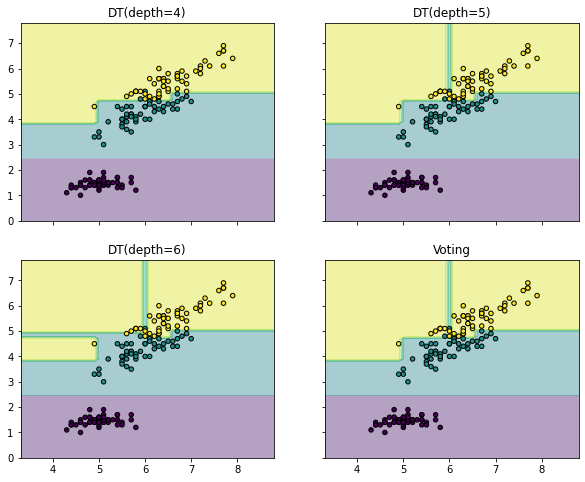

In [6]:
f,axarr=plt.subplots(2,2,sharex='col',sharey='row',figsize=(10,8))

for idx, clf, tt in zip (product([0,1],[0,1]), [clf1,clf2,clf3,eclf], ['DT(depth=4)', 'DT(depth=5)', 'DT(depth=6)','Voting']):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
    axarr[idx[0],idx[1]].set_title(tt)

plt.show()